In [1]:
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "output" / "10_Artificial_Neural_Ntwk_w_Keras"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Saving figure", fig_id)

In [2]:
# to make this notebook's output stable across runs
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # silent warning for TF 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR 

import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [3]:
# to make this notebook's output stable across runs
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # silent warning for TF 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR 

import tensorflow as tf
import numpy as np

def reset_graph(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")

In [4]:
f = x*x*y + y + 2
print(f, x, y)

tf.Tensor(42, shape=(), dtype=int32) <tf.Variable 'x:0' shape=() dtype=int32, numpy=3> <tf.Variable 'y:0' shape=() dtype=int32, numpy=4>


In [5]:
print(x.numpy(), y.numpy(), f.numpy())

3 4 42


In [6]:
# Perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [7]:
y_pred

array([ True, False])

In [8]:
# The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:
# extra code – shows how to build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

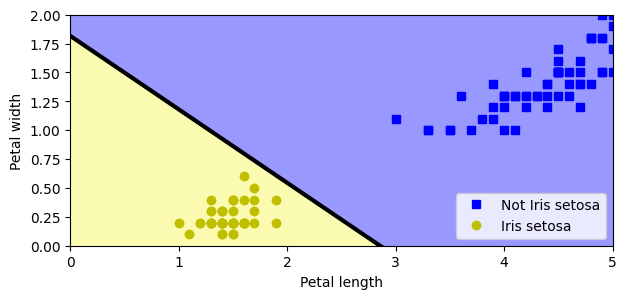

In [9]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

Saving figure activation_functions_plot_fig10-8


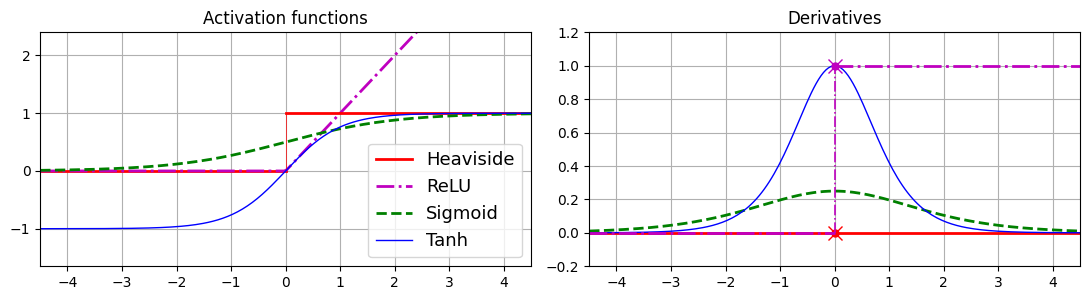

In [10]:
# Activation functions
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid

def relu(z):               # Activation function: ReLU(z) = max(0, z)
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot_fig10-8")
plt.show()


Regression MLPs
Warning: In recent versions of Scikit-Learn, you must use root_mean_squared_error() to compute the RMSE, instead of mean_squared_error(labels, predictions, squared=False). The following try/except block tries to import root_mean_squared_error, and if it fails it just defines it.

In [11]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968407

In [13]:
# Classification MLPs

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

Implementing MLPs with Keras
Building an Image Classifier Using the Sequential API
Using Keras to load the dataset
Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [15]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [16]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

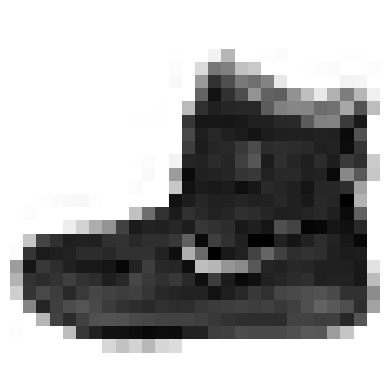

In [17]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
# the first image in the training set is an ankle boot:
class_names[y_train[0]]

'Ankle boot'

Saving figure fashion_mnist_plot_fig10-10


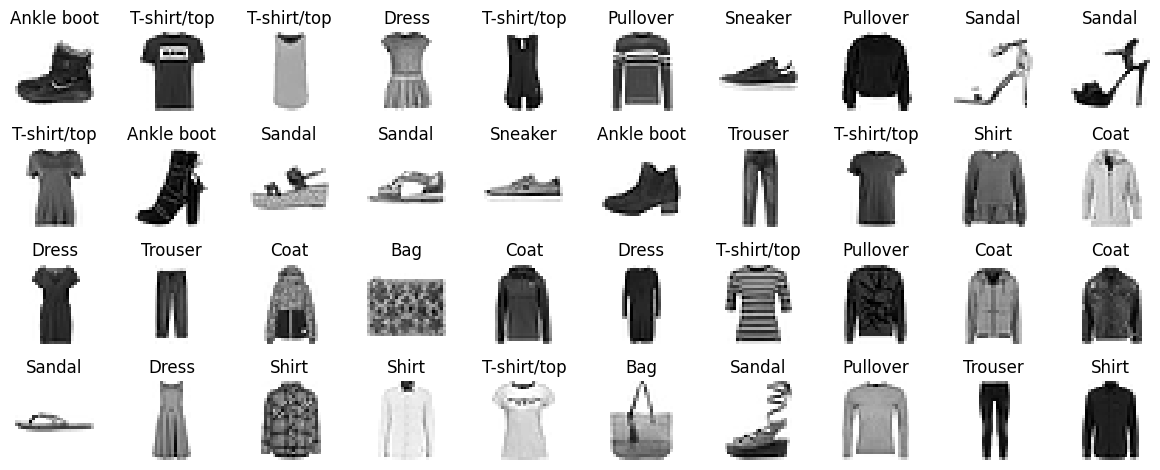

In [21]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot_fig10-10")
plt.show()

In [22]:
# Creating the model using the Sequential API
from tensorflow import keras

tf.random.set_seed(42)
model = keras.Sequential([
    keras.Input(shape=(28, 28)),                 # 28 features
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")                           # linear output for regression
])

In [23]:
# extra code – clear the session to reset the name counters
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.Sequential([
    keras.Input(shape=(28, 28, )),                 # 28 features
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")                           # linear output for regression
])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

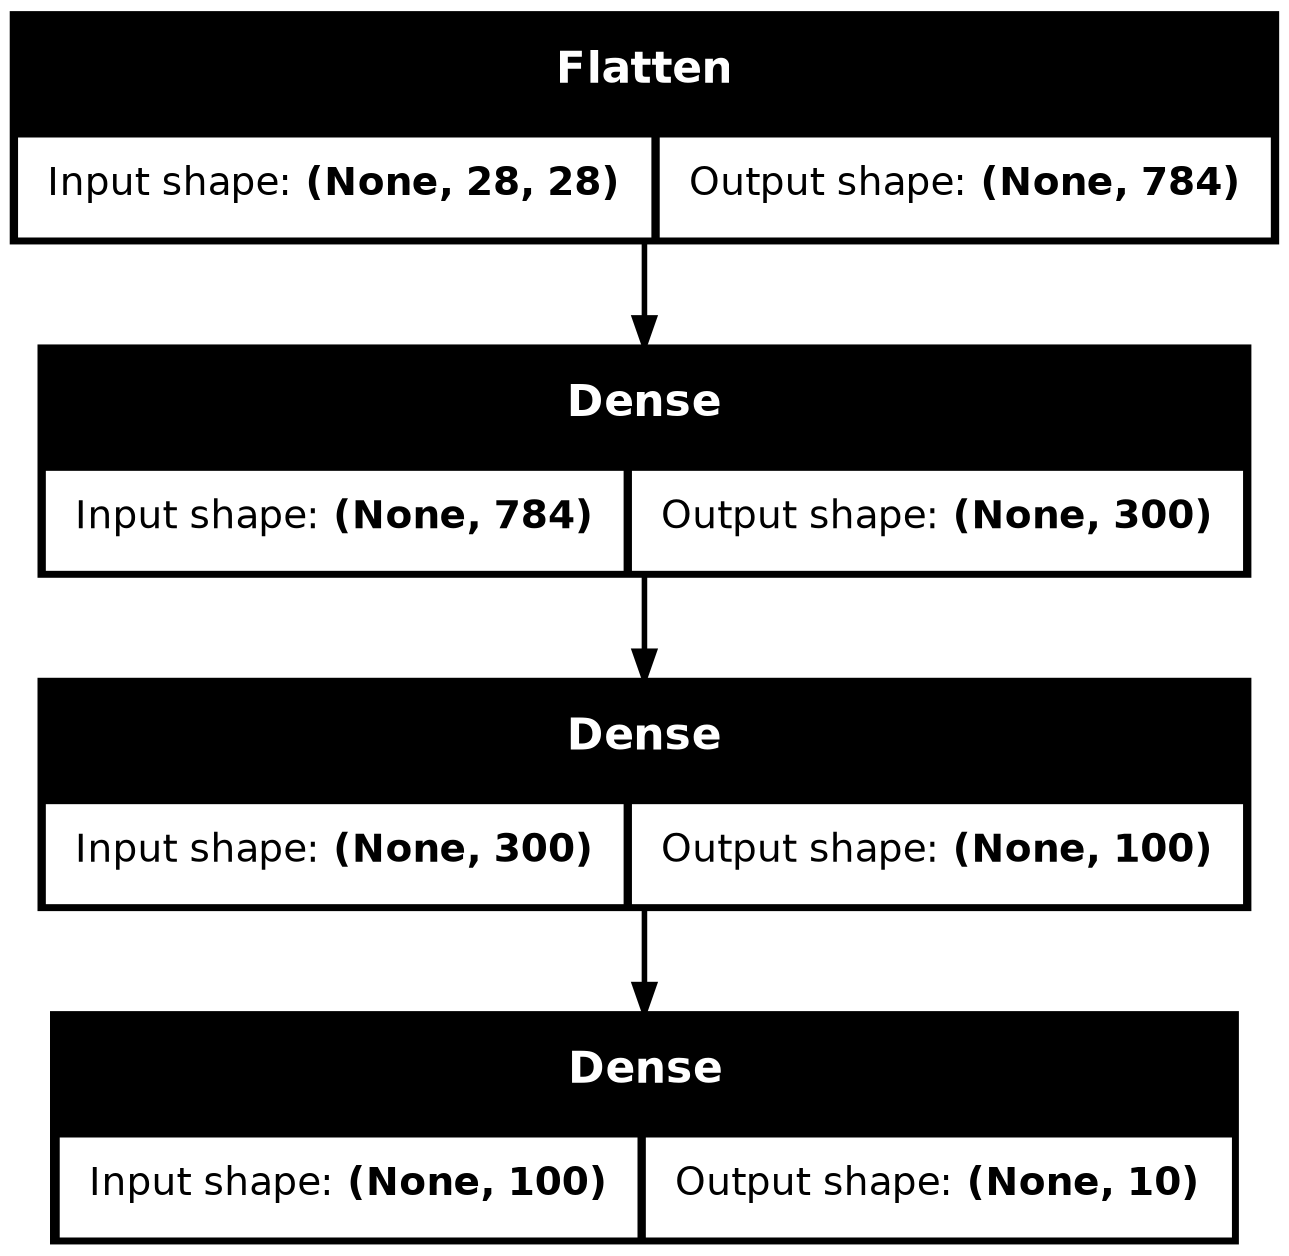

In [25]:
# extra code – another way to display the model's architecture
keras.utils.plot_model(model, "output/10_Artificial_Neural_Ntwk_w_Keras/my_fashion_mnist_model.png", show_shapes=True)

In [26]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer('dense') is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05457819,  0.03025606, -0.04654049, ...,  0.05701901,
        -0.01365558, -0.05942362],
       [-0.01652553,  0.04574437,  0.03590211, ..., -0.0630985 ,
        -0.02726785,  0.01571397],
       [-0.01421391, -0.03513769,  0.06348357, ...,  0.0239013 ,
         0.03646484,  0.07191631],
       ...,
       [-0.03224357,  0.07132019, -0.05331275, ..., -0.01702999,
        -0.0103078 , -0.04325122],
       [-0.0525008 , -0.0741495 , -0.04822339, ...,  0.01386286,
        -0.00344448, -0.03543392],
       [-0.02305549, -0.0365202 , -0.00059541, ..., -0.074187  ,
         0.00190514, -0.02359028]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [35]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

In [37]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7265 - sparse_categorical_accuracy: 0.7646 - val_loss: 0.5079 - val_sparse_categorical_accuracy: 0.8274
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4894 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.4558 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.4322 - val_sparse_categorical_accuracy: 0.8486
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4162 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.4179 - val_sparse_categorical_accuracy: 0.8514
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3959 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.4051 - val_sparse_categorical_accuracy: 0.8546
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3795 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.3975 - val_sparse_categorical_accuracy:

In [38]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Saving figure keras_learning_curves_plot_fig10-11


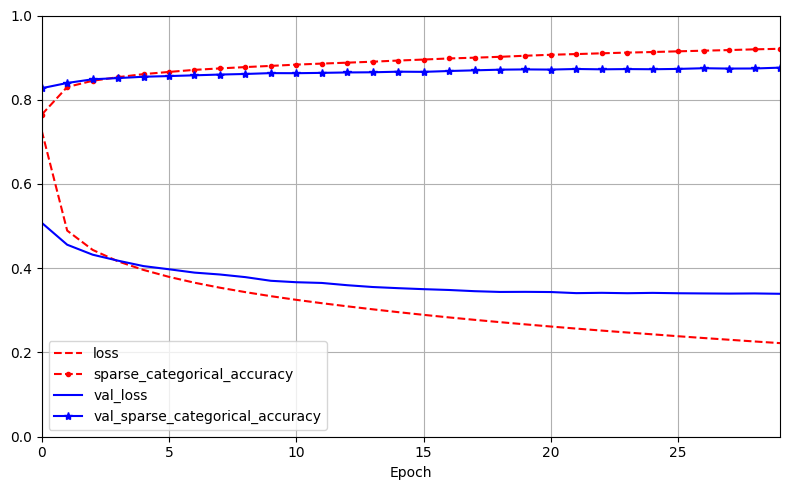

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot_fig10-11")  # extra code
plt.show()

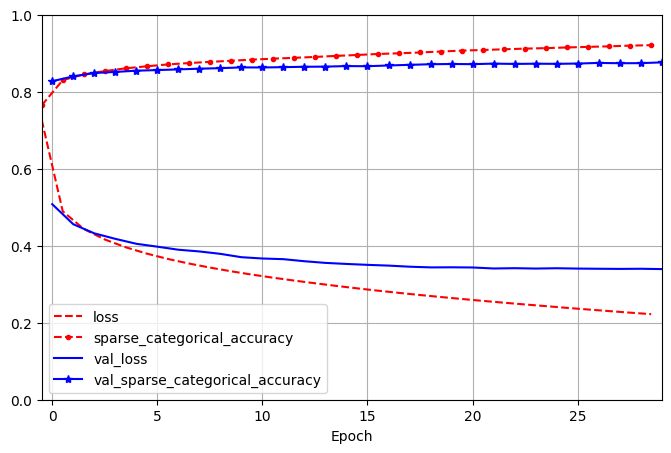

In [41]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3567 - sparse_categorical_accuracy: 0.8747


[0.3567475974559784, 0.8747000098228455]

In [43]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.02, 0.  , 0.85],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot_fig10-12


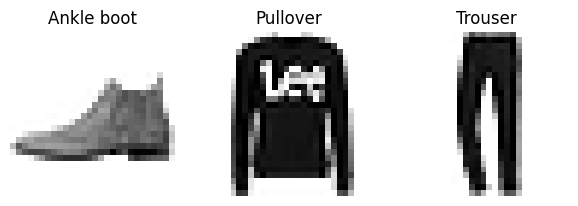

In [47]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot_fig10-12', tight_layout=False)
plt.show()

In [48]:
# Build a Regression MLP Using the Sequential API
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [49]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
model = tf.keras.Sequential([
    keras.Input(X_train.shape[1:]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 19.0944 - loss: 364.5978 - val_RootMeanSquaredError: 1.7069 - val_loss: 2.9137
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.1139 - loss: 1.2408 - val_RootMeanSquaredError: 1.5339 - val_loss: 2.3528
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.0624 - loss: 1.1287 - val_RootMeanSquaredError: 1.2549 - val_loss: 1.5747
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.9725 - loss: 0.9457 - val_RootMeanSquaredError: 0.8334 - val_loss: 0.6946
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.9900 - loss: 0.9801 - val_RootMeanSquaredError: 1.0900 - val_loss: 1.1881
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.0971 - loss: 1.2036 - val_RootMeanSquaredError: 0.9842 - val_loss: 0.9686
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.5746 - 

In [50]:
rmse_test, y_pred.T

(0.851911723613739, array([[1.213913 , 1.5050759, 2.4334373]], dtype=float32))

In [51]:
# Build Complex Models Using the Functional API
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [52]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

Warning: in recent versions, Keras requires one metric per output, so I replaced metrics=["RootMeanSquaredError"] with metrics=["RootMeanSquaredError", "RootMeanSquaredError"] in the code below.

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2684 - loss: 1.6087 - val_RootMeanSquaredError: 2.0737 - val_loss: 4.3001
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7032 - loss: 0.4946 - val_RootMeanSquaredError: 0.8956 - val_loss: 0.8021
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6360 - loss: 0.4045 - val_RootMeanSquaredError: 0.6562 - val_loss: 0.4306
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6117 - loss: 0.3741 - val_RootMeanSquaredError: 0.6025 - val_loss: 0.3630
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5973 - loss: 0.3567 - val_RootMeanSquaredError: 0.5813 - val_loss: 0.3379
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5890 - loss: 0.3469 - val_RootMeanSquaredError: 0.6453 - val_loss: 0.4164
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5816 - los

In [54]:
tf.random.set_seed(42)  # extra code

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.3337 - loss: 1.7788 - val_RootMeanSquaredError: 0.9073 - val_loss: 0.8231
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7804 - loss: 0.6090 - val_RootMeanSquaredError: 1.1246 - val_loss: 1.2647
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7054 - loss: 0.4976 - val_RootMeanSquaredError: 1.2155 - val_loss: 1.4774
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6633 - loss: 0.4399 - val_RootMeanSquaredError: 1.5662 - val_loss: 2.4530
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6487 - loss: 0.4208 - val_RootMeanSquaredError: 1.5480 - val_loss: 2.3962
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6260 - loss: 0.3919 - val_RootMeanSquaredError: 1.8997 - val_loss: 3.6090
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6307 - los

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_2_RootMeanSquaredError: 1.3236 - dense_2_loss: 1.7512 - dense_3_RootMeanSquaredError: 1.3732 - dense_3_loss: 1.8853 - loss: 1.7652 - val_dense_2_RootMeanSquaredError: 0.9150 - val_dense_2_loss: 0.8370 - val_dense_3_RootMeanSquaredError: 1.4899 - val_dense_3_loss: 2.2190 - val_loss: 0.9755
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.7386 - dense_2_loss: 0.5455 - dense_3_RootMeanSquaredError: 0.8916 - dense_3_loss: 0.7949 - loss: 0.5704 - val_dense_2_RootMeanSquaredError: 0.6885 - val_dense_2_loss: 0.4740 - val_dense_3_RootMeanSquaredError: 1.0353 - val_dense_3_loss: 1.0716 - val_loss: 0.5339
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.6717 - dense_2_loss: 0.4512 - dense_3_RootMeanSquaredError: 0.7768 - dense_3_loss: 0.6034 - loss: 0.4664 - val_dense_2_RootMeanSquaredError: 0.8464 - val_dense_2_loss: 0.7161 - val_dense_3_RootMeanSquaredError: 0.7

Warning: in recent TF version, evaluate() also returns the main metric and the aux metric. To ensure the code works in both old and new versions, we only look at the first 3 elements of eval_results (i.e., just the losses):

In [58]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss = eval_results[:3]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5733 - dense_2_loss: 0.3284 - dense_3_RootMeanSquaredError: 0.6230 - dense_3_loss: 0.3881 - loss: 0.3347  


In [59]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [60]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [61]:
# Using the subclassing API to Build Dynamic Modeles
# define layers in __init__() and define computation in call()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

Warning: as explained above, Keras now requires one loss and one metric per output, so I replaced loss="mse" with loss=["mse", "mse"] and I also replaced metrics=["RootMeanSquaredError"] with metrics=["RootMeanSquaredError", "RootMeanSquaredError"] in the code below.

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.3308 - RootMeanSquaredError_1: 1.8738 - loss: 1.9449 - mse_loss: 3.5102 - val_RootMeanSquaredError: 0.8254 - val_RootMeanSquaredError_1: 2.6696 - val_loss: 1.3258 - val_mse_loss: 7.1236
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7610 - RootMeanSquaredError_1: 1.0492 - loss: 0.6313 - mse_loss: 1.1008 - val_RootMeanSquaredError: 0.7017 - val_RootMeanSquaredError_1: 0.9623 - val_loss: 0.5358 - val_mse_loss: 0.9259
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7001 - RootMeanSquaredError_1: 0.8740 - loss: 0.5175 - mse_loss: 0.7639 - val_RootMeanSquaredError: 0.8211 - val_RootMeanSquaredError_1: 0.8533 - val_loss: 0.6795 - val_mse_loss: 0.7281
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6564 - RootMeanSquaredError_1: 0.8024 - loss: 0.4522 - mse_loss: 0.6438 - val_RootMeanSquaredError: 0.7320 - val_RootMeanSquaredEr

In [63]:
y_pred_main, y_pred_aux

(array([[0.6972589],
        [1.4557227],
        [3.4399137]], dtype=float32),
 array([[0.7549837],
        [1.6460637],
        [2.902422 ]], dtype=float32))

In [64]:
# Saving and Restoring a Model
# extra code – delete the directory, in case it already exists
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

Warning: Keras now recommends using the .keras format to save models, and the h5 format for weights. Therefore I have updated the code in this section to first show what you need to change if you still want to use TensorFlow's SavedModel format, and then how you can use the recommended formats.
Warning: Keras's model.save() method no longer supports TensorFlow's SavedModel format. However, you can still export models to the SavedModel format using model.export() like this:

In [65]:
model.export("saved_models/my_keras_model")

INFO:tensorflow:Assets written to: saved_models/my_keras_model/assets


INFO:tensorflow:Assets written to: saved_models/my_keras_model/assets


Saved artifact at 'saved_models/my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  123488702996048: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  123488702993360: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  123488703105744: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  123488703003344: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  123488703002960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  123488703114000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  123488703116304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  123488703113616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  123488703118800: Tens

In [66]:
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

In [67]:
tfsm_layer = tf.keras.layers.TFSMLayer("saved_models/my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

In [68]:
model.save_weights("saved_models/my_weights.weights.h5")

In [69]:
model.load_weights("saved_models/my_weights.weights.h5")

In [70]:
# To save a model using the .keras format, simply use model.save():
model.save("saved_models/my_model.keras")

In [71]:
# To load a .keras model, use the tf.keras.models.load_model() function. If the model uses any custom object,
# you must pass them to the function via the custom_objects argument:
loaded_model = tf.keras.models.load_model(
    "saved_models/my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

In [72]:
loaded_model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 5)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_5 (Normalization) │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

In [73]:
# Using Callbacks
shutil.rmtree("my_checkpoints", ignore_errors=True)  # extra code

In [74]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("saved_models/my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5953 - RootMeanSquaredError_1: 0.6719 - loss: 0.3641 - mse_loss: 0.4514 - val_RootMeanSquaredError: 1.1364 - val_RootMeanSquaredError_1: 1.0675 - val_loss: 1.2762 - val_mse_loss: 1.1392
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5887 - RootMeanSquaredError_1: 0.6617 - loss: 0.3557 - mse_loss: 0.4379 - val_RootMeanSquaredError: 0.8318 - val_RootMeanSquaredError_1: 0.6701 - val_loss: 0.6677 - val_mse_loss: 0.4490
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5838 - RootMeanSquaredError_1: 0.6532 - loss: 0.3494 - mse_loss: 0.4267 - val_RootMeanSquaredError: 0.9908 - val_RootMeanSquaredError_1: 1.1768 - val_loss: 1.0219 - val_mse_loss: 1.3844
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5832 - RootMeanSquaredError_1: 0.6536 - loss: 0.3488 - mse_loss: 0.4272 - val_RootMeanSquaredError: 0.9769 - val_RootMeanSquaredEr

In [75]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5723 - RootMeanSquaredError_1: 0.6284 - loss: 0.3343 - mse_loss: 0.3950 - val_RootMeanSquaredError: 0.8094 - val_RootMeanSquaredError_1: 0.8292 - val_loss: 0.6583 - val_mse_loss: 0.6874
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5702 - RootMeanSquaredError_1: 0.6275 - loss: 0.3320 - mse_loss: 0.3938 - val_RootMeanSquaredError: 0.6800 - val_RootMeanSquaredError_1: 0.6196 - val_loss: 0.4545 - val_mse_loss: 0.3839
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5686 - RootMeanSquaredError_1: 0.6243 - loss: 0.3299 - mse_loss: 0.3898 - val_RootMeanSquaredError: 0.9467 - val_RootMeanSquaredError_1: 0.9901 - val_loss: 0.9047 - val_mse_loss: 0.9799
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5697 - RootMeanSquaredError_1: 0.6255 - loss: 0.3312 - mse_loss: 0.3914 - val_RootMeanSquaredError: 0.9955 - val_RootMeanSquar

In [76]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [77]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=3.25
Epoch=1, val/train=4.57
Epoch=2, val/train=5.25
Epoch=3, val/train=2.55
Epoch=4, val/train=1.98
Epoch=5, val/train=1.24
Epoch=6, val/train=1.52
Epoch=7, val/train=1.45
Epoch=8, val/train=2.45
Epoch=9, val/train=2.44


In [78]:
# Using TensorBoard for Visualization

shutil.rmtree("my_logs", ignore_errors=True)

In [79]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    path = Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
    path.mkdir(parents=True, exist_ok=True)
    return path

run_logdir = get_run_logdir()

In [80]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [81]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2815 - loss: 1.6422 - val_RootMeanSquaredError: 0.9554 - val_loss: 0.9128
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8971 - loss: 0.8049 - val_RootMeanSquaredError: 0.8500 - val_loss: 0.7226
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8519 - loss: 0.7257 - val_RootMeanSquaredError: 0.8073 - val_loss: 0.6517
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8178 - loss: 0.6689 - val_RootMeanSquaredError: 0.7759 - val_loss: 0.6020
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7892 - loss: 0.6229 - val_RootMeanSquaredError: 0.7497 - val_loss: 0.5621
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7649 - loss: 0.5851 - val_RootMeanSquaredError: 0.7275 - val_loss: 0.5293
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7442 - los

In [82]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2026_01_16_04_48_14
    train
      events.out.tfevents.1768556894.Snowman.1128.0.v2
      plugins
        profile
          2026_01_16_04_48_15
            Snowman.xplane.pb
    validation
      events.out.tfevents.1768556895.Snowman.1128.1.v2


In [83]:
# Let's load the tensorboard Jupyter extension and start the TensorBoard server:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [84]:
# Note: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:
# extra code
import sys

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

In [85]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [86]:
# extra code – lists all running TensorBoard server instances
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:11 ago; pid 14921)


In [108]:
# Fine-Tuning Neural Network Hyperparameters
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [109]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [110]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value = 0, max_value = 8, default = 2)
    n_neurons = hp.Int("n_neurons", min_value = 16, max_value = 256)
    learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation = "relu"))
    model.add(tf.keras.layers.Dense(10, activation = "softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

In [111]:
random_search_tuner = kt.RandomSearch(build_model, objective = "val_accuracy",
            max_trials = 5, overwrite = True, directory = "output/my_fashion_mnist",
            project_name = "my_rnd_search", seed = 42)
random_search_tuner.search(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.8367999792098999

Best val_accuracy So Far: 0.8575999736785889
Total elapsed time: 00h 02m 34s


In [112]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [113]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [114]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8575999736785889


In [115]:
best_trial.metrics.get_last_value("val_accuracy")

0.8575999736785889

In [116]:
best_model.fit(X_train_full, y_train_full, epochs = 10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3336
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8807 - loss: 0.3205
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.3116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8872 - loss: 0.3018
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8900 - loss: 0.2946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8928 - loss: 0.2873
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8954 - loss: 0.2811
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8974 - loss: 0.2745
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.2691
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9012 - loss: 0.2637
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8570 - loss: 0.4197


In [117]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,112 (547.32 KB)

 Trainable params: 140,110 (547.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [118]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [119]:
hyperband_tuner = kt.Hyperband(MyClassificationHyperModel(), objective = "val_accuracy",
                    seed = 42, max_epochs = 10, factor = 3, hyperband_iterations = 2,
                    overwrite = True, directory = "output/my_fashion_mnist", 
                    project_name = "hyperband")    

In [121]:
root_logdir = Path(hyperband_tuner.project_dir)/"tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 2)
hyperband_tuner.search(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid),
                       callbacks = [early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 43s]
val_accuracy: 0.8258000016212463

Best val_accuracy So Far: 0.8712000250816345
Total elapsed time: 00h 18m 46s


In [124]:
bayesian_opt_tuner = kt.BayesianOptimization(MyClassificationHyperModel(),
                        objective = "val_accuracy", seed = 42,
                        max_trials = 10, alpha = 1e-4, beta = 2.6, overwrite = True,
                        directory = "output/my_fashion_mnist", project_name = "bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])                        

Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.8363999724388123

Best val_accuracy So Far: 0.8601999878883362
Total elapsed time: 00h 05m 08s


In [125]:
%tensorboard --logdir {root_logdir}

In [126]:
# Execise 10 Train a deep MLP on the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [127]:
X_train_full.shape

(60000, 28, 28)

In [128]:
X_train_full.dtype

dtype('uint8')

In [129]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

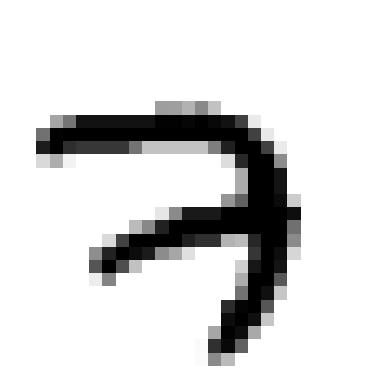

In [131]:
# Let's plot an image using Matplotlib's imshow() function, with a 'binary' color map:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [132]:
# The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to
# the digits represented in the images, so we don't need a class_names array:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [133]:
# The validation set contains 5,000 images, and the test set contains 10,000 images:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

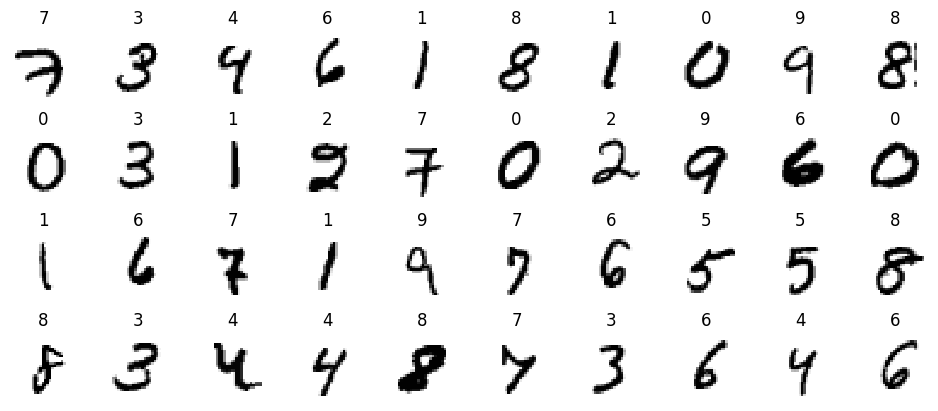

In [134]:
# Let's take a look at a sample of the images in the dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [135]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [136]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [139]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [140]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [141]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6112 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

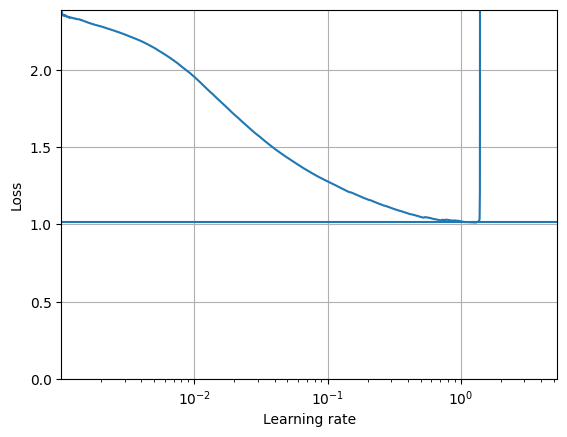

In [142]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [144]:
# The loss starts shooting back up violently when the learning rate goes over 6e-1, so try to use half of that, at 3e-1:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [145]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [147]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_logs/my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_logs/my_mnist_logs/run_001')

In [148]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9274 - loss: 0.2334 - val_accuracy: 0.9676 - val_loss: 0.1052
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.0905 - val_accuracy: 0.9738 - val_loss: 0.0891
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0590 - val_accuracy: 0.9724 - val_loss: 0.0905
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9758 - val_loss: 0.0936
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0342 - val_accuracy: 0.9776 - val_loss: 0.0900
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9742 - val_loss: 0.1089
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9722 - val_loss: 0.1151
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0

In [150]:
%tensorboard --logdir=./my_logs/my_mnist_logs